In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sc

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:168: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


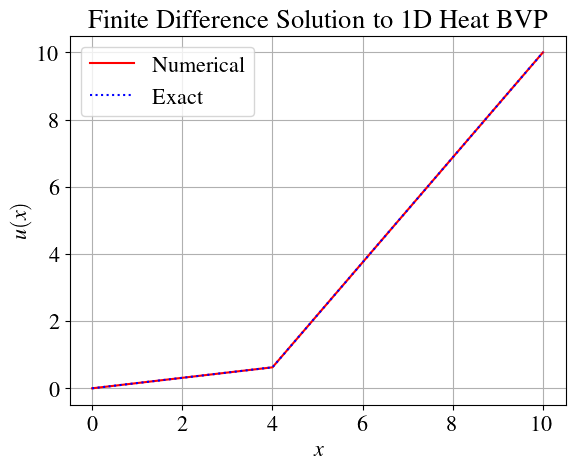

In [51]:
h = 1.0
a, b = 0, 10 
k1, k2 = 10, 1
ua,ub = 0, 10
c = 4
n = 9

def k(x): 
    if x < c and x >= a: 
        return k1 
    elif x > c and x <= b: 
        return k2 
    else: 
        print("Invalid bounds.")
        return None 

def exact(x):
    alpha = (k1*k2*(ub-ua))/(b*k1 - a*k2 + c*(k2 - k1))
    beta1 = (b*k1*ua - a*k2*ub + c*ua*(k2-k1))/(b*k1 - a*k2 + c*(k2 - k1))
    beta2 = (a*k2*ub - b*k1*ua - c*ub*(k2-k1))/(-b*k1 + a*k2 - c*(k2 - k1))
    uc = (alpha/k1)*c +beta1 
    if x < c and x >= a: 
        return (alpha/k1)*x + beta1
    elif x > c and x <= b: 
        return (alpha/k2)*x + beta2 
    else:
        return uc
# Construct matrix A
x = np.linspace(a+h, b, n, endpoint=False)
kw = np.array([k(i - (h/2))for i in x])
ke= np.array([k(i + (h/2))for i in x])
A = (-1/h**2)*sc.sparse.diags([ke, -(ke+kw), ke], [-1,0,1], (n,n)).toarray()
f = np.zeros(n)
f[0] = (1/h**2)*ua*kw[0]
f[-1] = (1/h**2)*ub*ke[-1]
u = sc.sparse.linalg.spsolve(A, f)

pltx = np.linspace(a,b, 11)
u = np.append(u, ub)
u = np.insert(u, 0, ua)


# Plot solution
plt.rcParams.update({
        "font.family": "Times", 
        "text.usetex": True,
        "font.size": 16
    })

ex = np.array([exact(x) for x in pltx])
plt.plot(pltx,u, label='Numerical', color='red')
plt.plot(pltx, ex, linestyle=":", label='Exact', color='blue')
plt.xlabel('$x$')
plt.legend()
plt.ylabel('$u(x)$')
plt.title('Finite Difference Solution to 1D Heat BVP')
plt.grid()
